# predict the survival outcome of passengers on the Titanic

## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set()
import IPython
from IPython import display
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from  sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV
import random
import time
import warnings
warnings.filterwarnings('ignore')

## Meet and Greet Data

In [2]:
# define the train data
train_data = pd.read_csv('train.csv')

# define the test data
test_data = pd.read_csv('test.csv')

# create a copy of data to play with it
data_1 = train_data.copy()

# combine the train and test data in one variable
data_cleaner = [data_1, test_data]

# show the info and sample of the data
print(data_1.info())
data_1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S


## Data cleaning : Correcting, Completing, Creating, Converting

In [3]:
print('the train data with null values')
print(data_1.isnull().sum()) 
print('-'*20)

print('the test data with null values')
print(test_data.isnull().sum())

data_1.describe(include = 'all')

the train data with null values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
the test data with null values
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Clean Data

In [4]:
# Deal with missing values
for dataset in data_cleaner:
    # replace null values with median value
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)  

    # replace Embarked null values with the most frequent one
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    # replace Fare null values with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

# drop unneccessary columns from training data
dropping_cols = ['PassengerId', 'Ticket', 'Cabin']
data_1.drop(dropping_cols, axis = 1, inplace = True)

print(data_1.isnull().sum())
print('-'*20)
print(test_data.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [5]:
# CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:
    # FamilySize = Sibpsp + Parch + 1--> (the passenger itself)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    # IsAlone = if family size > 1 the passenger is not alone (0) otherwise (1) Alone
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0

    dataset['Title'] = dataset['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0]

    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    dataset['AgeBin'] = pd.cut(dataset['Age'].astype('int'), 5)

In [6]:
data_1['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [7]:
# replace the title with less than 10 value counts with (Misc)
title_names = data_1['Title'].value_counts() < 10
data_1['Title'] = data_1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

print('Value Counts of Title Column')
print(data_1['Title'].value_counts())
print('-'*20)

print('training data info:')
data_1.info()
print('-'*20)

print('testing data info:')
test_data.info()
data_1.sample(10)

Value Counts of Title Column
Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
--------------------
training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
510,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,S,7,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
796,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,25.9292,S,1,1,Misc,"(14.454, 31.0]","(48.0, 64.0]"
695,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,13.5000,S,1,1,Mr,"(7.91, 14.454]","(48.0, 64.0]"
217,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,27.0000,S,2,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
495,0,3,"Yousseff, Mr. Gerious",male,28.0,0,0,14.4583,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
95,0,3,"Shorney, Mr. Charles Joseph",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
786,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,7.4958,S,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
168,0,1,"Baumann, Mr. John D",male,28.0,0,0,25.9250,S,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
342,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"


### Encoding Data

In [8]:
le = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_code'] = le.fit_transform(dataset['Sex'])
    dataset['Embarked_code']  = le.fit_transform(dataset['Embarked'])
    dataset['Title_code'] = le.fit_transform(dataset['Title'])
    dataset['FareBin_code'] = le.fit_transform(dataset['FareBin'])
    dataset['AgeBin_code'] = le.fit_transform(dataset['AgeBin'])

In [9]:
data_1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_code,Embarked_code,Title_code,FareBin_code,AgeBin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,3,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,3,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,1,2


### Identify Inputs and Target of the data

In [10]:
data_1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'FareBin', 'AgeBin',
       'Sex_code', 'Embarked_code', 'Title_code', 'FareBin_code',
       'AgeBin_code'],
      dtype='object')

In [11]:
target  = ['Survived']

data_1_x = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title']  # with addition columns and without coded and Bin columns

data_1_x_calc = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_code', 'Embarked_code', 'Title_code'] # without addition columns and with coded columns

data_1_xy = target + data_1_x
print('Original_xy', data_1_xy, '\n')

data_1_x_bin = ['Pclass', 'Sex_code', 'Embarked_code', 'FamilySize', 'IsAlone', 'Title_code', 'FareBin_code', 'AgeBin_code']

data_1_xy_bin = target + data_1_x_bin
print('Bin_xy', data_1_xy_bin, '\n')

data_with_dummies = pd.get_dummies(data_1[data_1_x])
dummies = data_with_dummies.columns.to_list()
data_xy_dummies = target + dummies
print('dummies_xy', data_xy_dummies)

Original_xy ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title'] 

Bin_xy ['Survived', 'Pclass', 'Sex_code', 'Embarked_code', 'FamilySize', 'IsAlone', 'Title_code', 'FareBin_code', 'AgeBin_code'] 

dummies_xy ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


In [12]:
data_with_dummies.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,2,0,False,True,False,False,True,False,False,False,True,False
1,1,38.0,1,0,71.2833,2,0,True,False,True,False,False,False,False,False,False,True
2,3,26.0,0,0,7.9250,1,1,True,False,False,False,True,False,False,True,False,False
3,1,35.0,1,0,53.1000,2,0,True,False,False,False,True,False,False,False,False,True
4,3,35.0,0,0,8.0500,1,1,False,True,False,False,True,False,False,False,True,False


## Perform Exploratory Data Analysis with Statistics

### Correlation Matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Pclass'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'SibSp'),
  Text(4.5, 0, 'Parch'),
  Text(5.5, 0, 'Fare'),
  Text(6.5, 0, 'FamilySize'),
  Text(7.5, 0, 'IsAlone'),
  Text(8.5, 0, 'Sex_code'),
  Text(9.5, 0, 'Embarked_code'),
  Text(10.5, 0, 'Title_code'),
  Text(11.5, 0, 'FareBin_code'),
  Text(12.5, 0, 'AgeBin_code')])

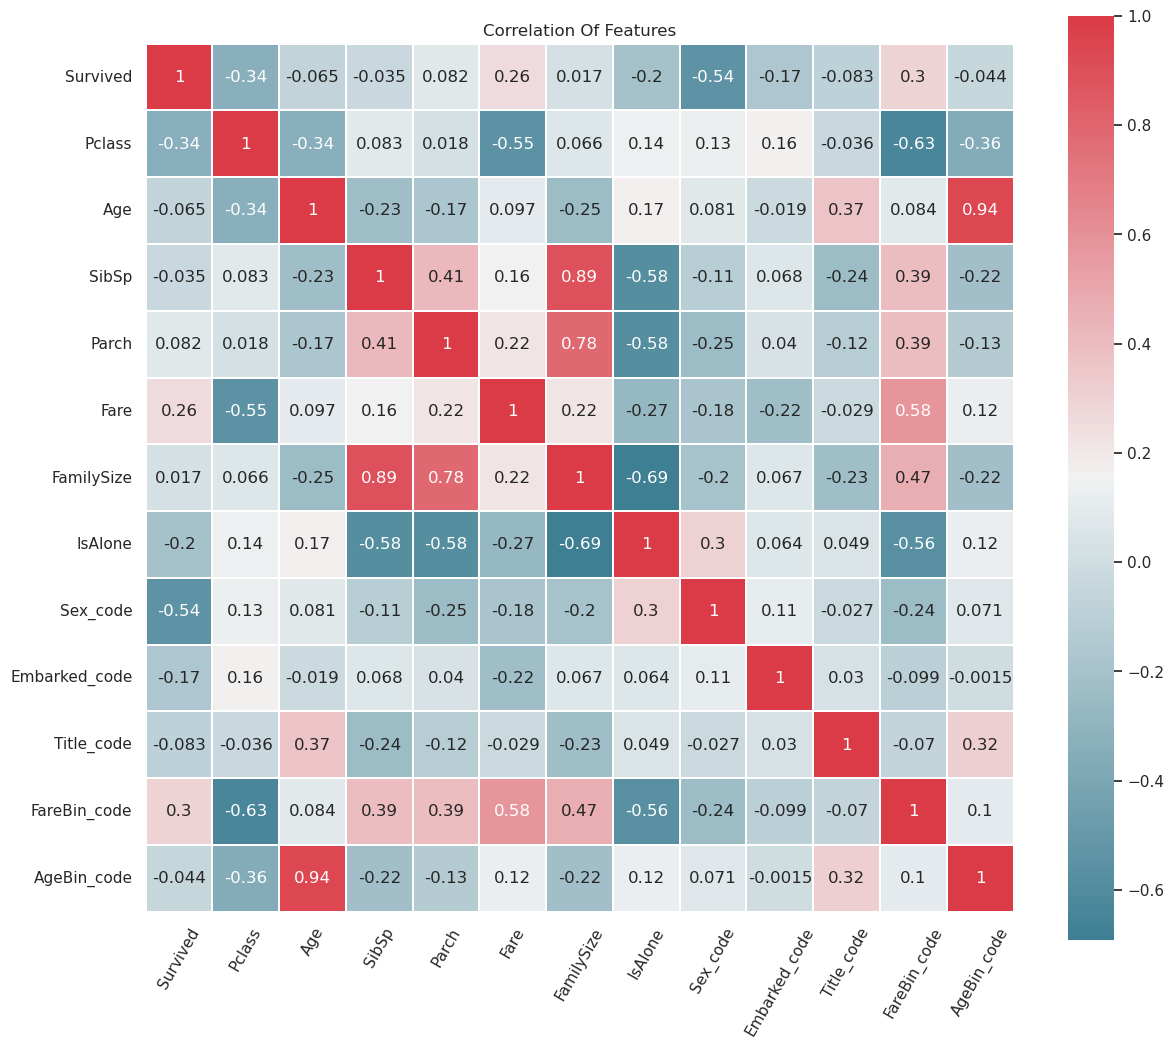

In [13]:
#correlation heatmap of dataset
data_2 = data_1.drop(['Sex', 'Embarked', 'AgeBin', 'FareBin', 'Name', 'Title'], axis = 1)
plt.figure(figsize = (14, 12))
sns.heatmap(data_2.corr(), cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True, annot = True, linewidths = 0.1, vmax = 1.0,
            linecolor = 'white', annot_kws = {'fontsize': 12})
plt.title('Correlation Of Features')
plt.xticks(rotation = 60)

### Graph Distribution of Quantitative Data

Text(0, 0.5, '(#) of passengers')

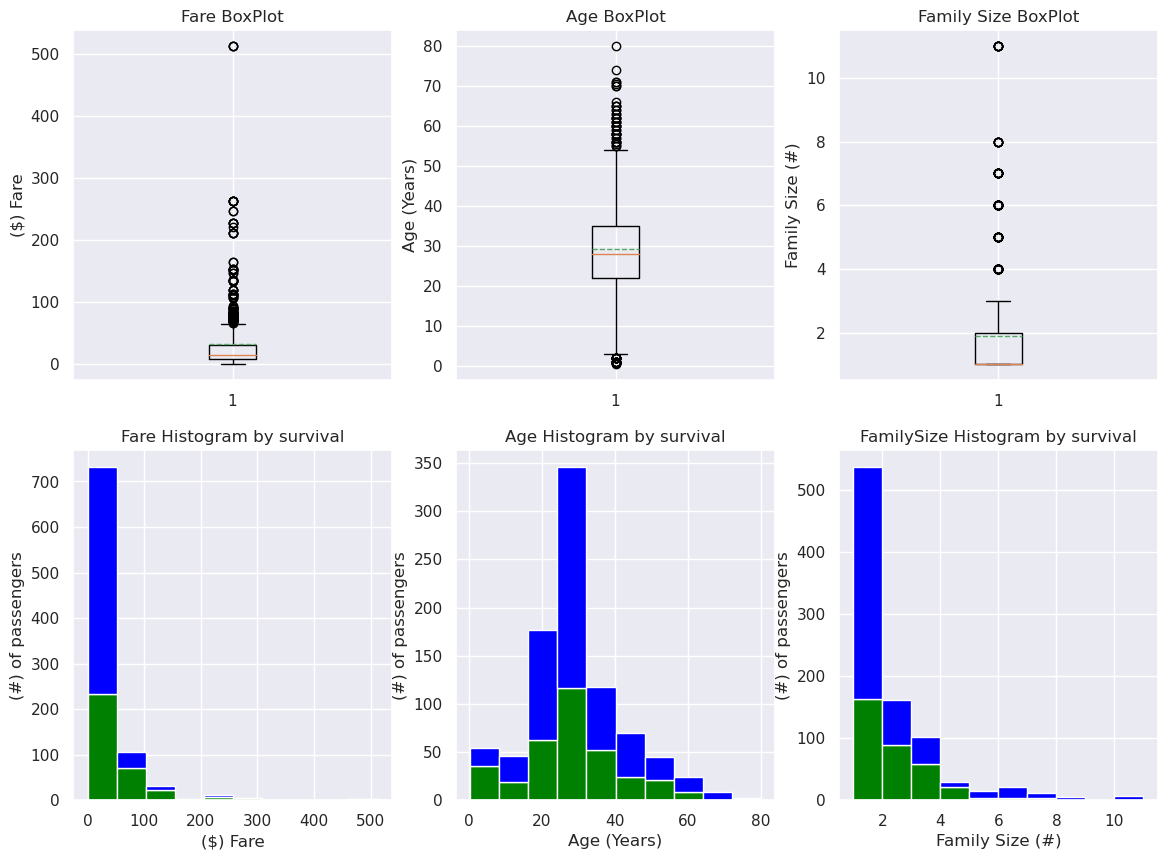

In [14]:
plt.figure(figsize = (14, 10))

plt.subplot(231)
plt.boxplot(data_1['Fare'], showmeans = True, meanline = True)
plt.title('Fare BoxPlot')
plt.ylabel('($) Fare')

plt.subplot(232)
plt.boxplot(data_1['Age'], showmeans = True, meanline = True)
plt.title('Age BoxPlot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data_1['FamilySize'], showmeans = True , meanline = True)
plt.title('Family Size BoxPlot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data_1[data_1['Survived'] == 1]['Fare'], data_1[data_1['Survived'] == 0]['Fare']],
         stacked = True, color = ['green', 'blue'], label = ['Survived', 'Dead'])
plt.title('Fare Histogram by survival')
plt.xlabel('($) Fare')
plt.ylabel('(#) of passengers')

plt.subplot(235)
plt.hist(x = [data_1[data_1['Survived'] == 1]['Age'], data_1[data_1['Survived'] == 0]['Age']],
         stacked = True, color = ['green', 'blue'], label = ['Survived', 'Dead'])
plt.title('Age Histogram by survival')
plt.xlabel('Age (Years)')
plt.ylabel('(#) of passengers')

plt.subplot(236)
plt.hist(x = [data_1[data_1['Survived'] == 1]['FamilySize'], data_1[data_1['Survived'] == 0]['FamilySize']],
         stacked = True, color = ['green', 'blue'], label = ['Survived', 'Dead'])
plt.title('FamilySize Histogram by survival')
plt.xlabel('Family Size (#)')
plt.ylabel('(#) of passengers')


### Graph Individual Features by the Target

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

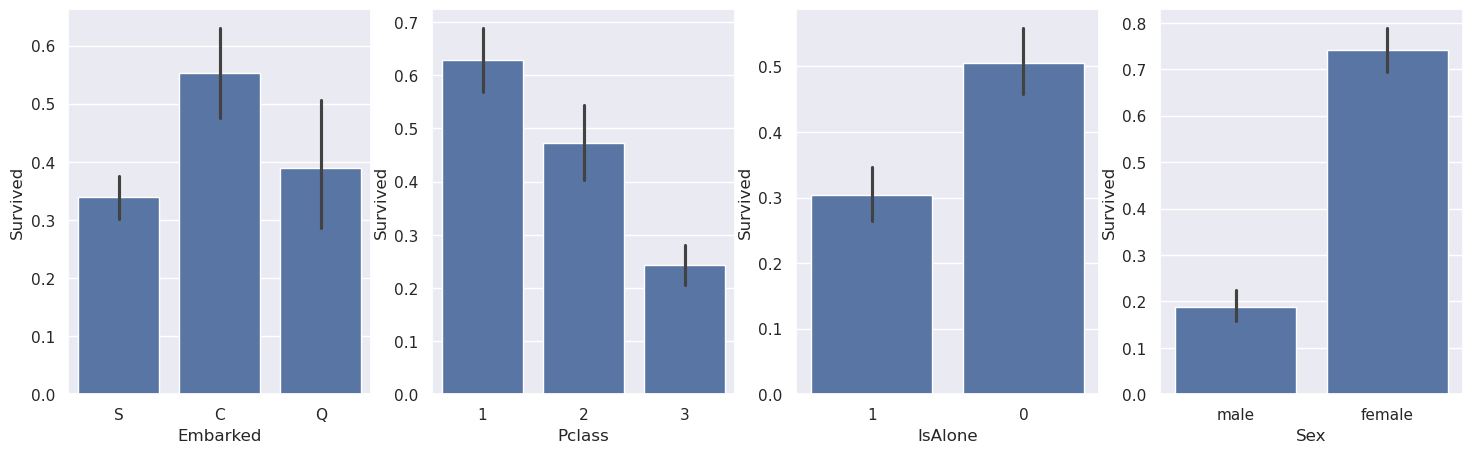

In [15]:
plt.figure(figsize = (18, 5))

plt.subplot(141)
sns.barplot(x = 'Embarked', y = 'Survived', data=data_1)

plt.subplot(142)
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data_1)

plt.subplot(143)
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data_1)

plt.subplot(144)
sns.barplot(x = 'Sex', y = 'Survived', data=data_1)

### Graph Distribution of Qualitative Data

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

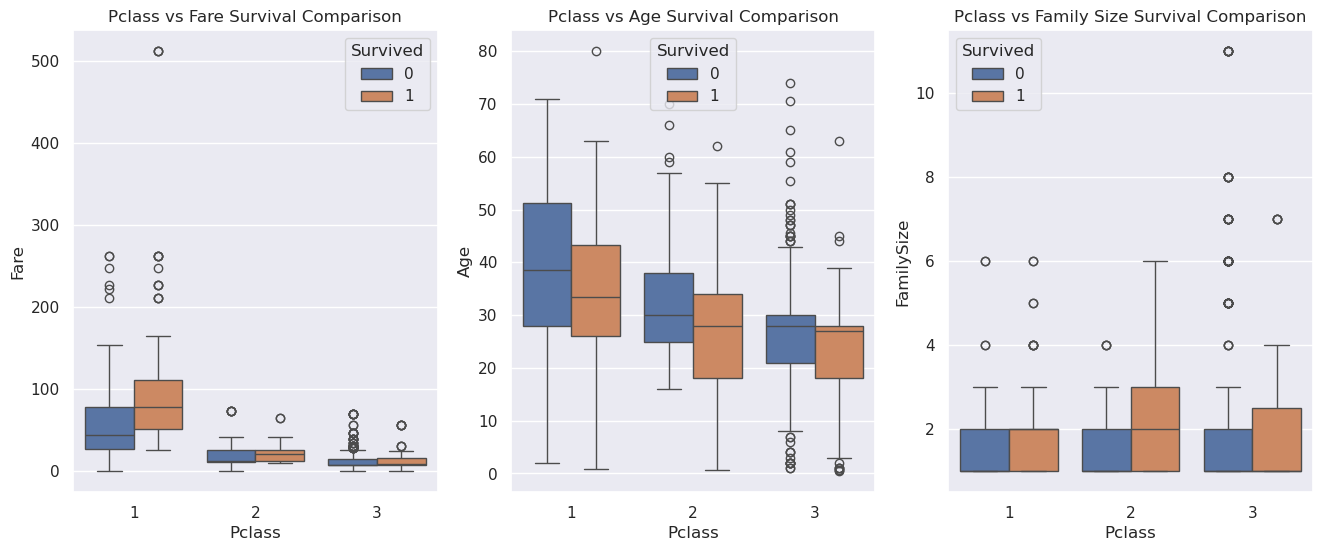

In [16]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(16,6))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data_1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.boxplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data_1, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data_1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

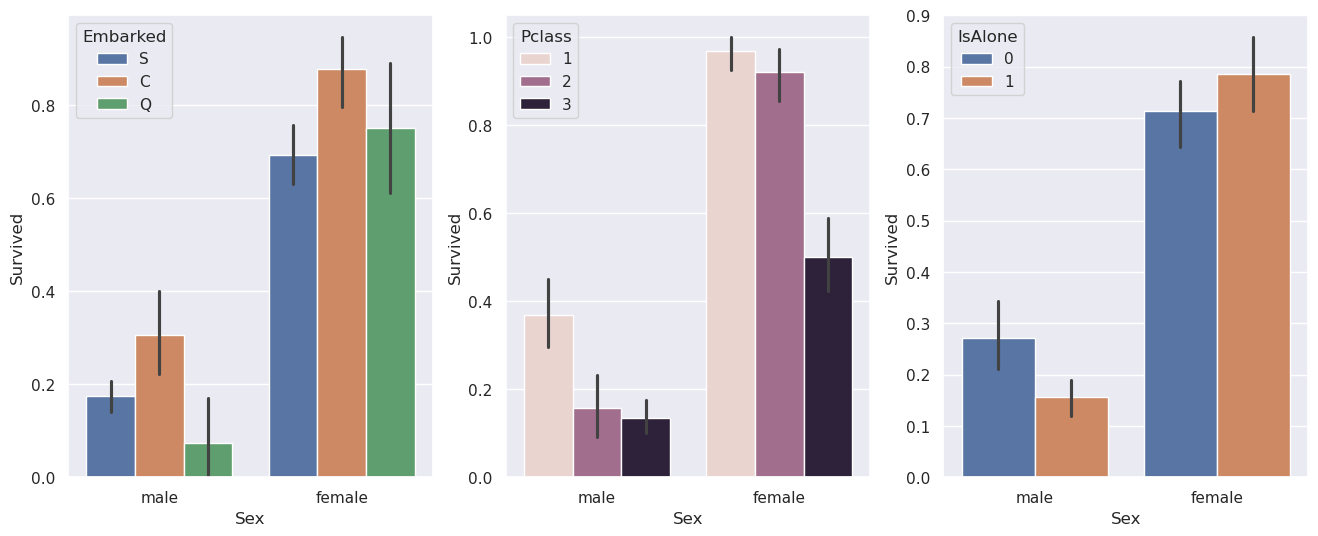

In [17]:
fig, qaxis = plt.subplots(1,3,figsize=(16,6))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data = data_1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = data_1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data = data_1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

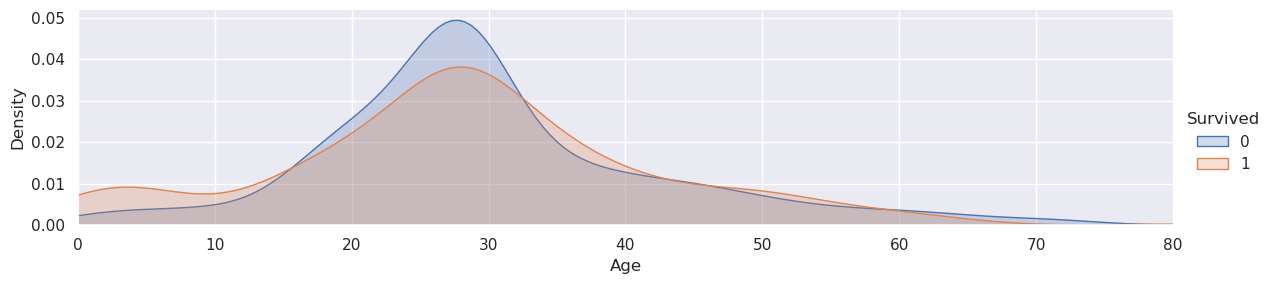

In [18]:
#plot distributions of age of passengers who survived or did not survive

s = sns.FacetGrid(data_1, hue = 'Survived', aspect = 4)
s.map(sns.kdeplot, 'Age', shade = True)
s.set(xlim = (0, data_1['Age'].max()))
s.add_legend()

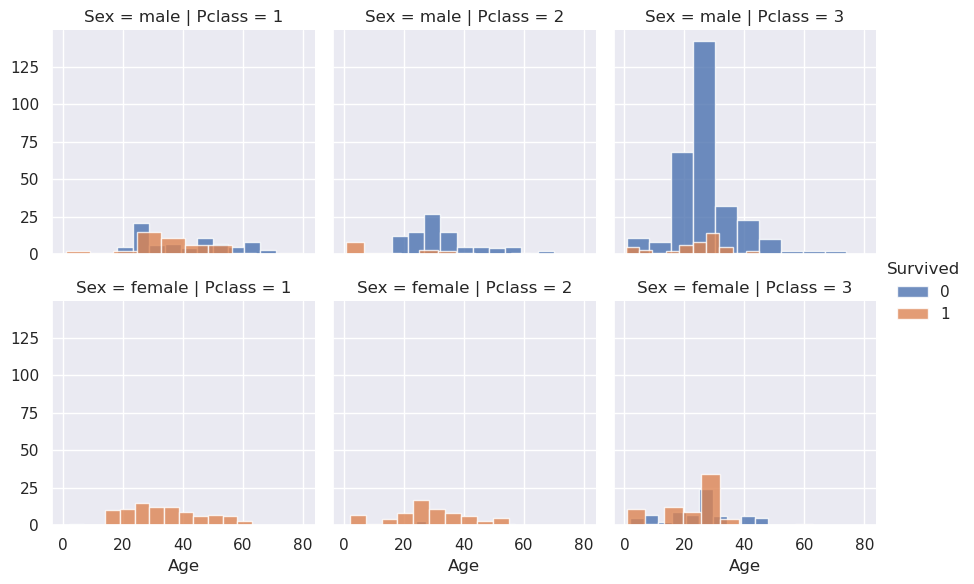

In [19]:
#histogram comparison of sex, class, and age by survival

h = sns.FacetGrid(data_1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = 0.8)
h.add_legend()

### PairPlot Of the entire data

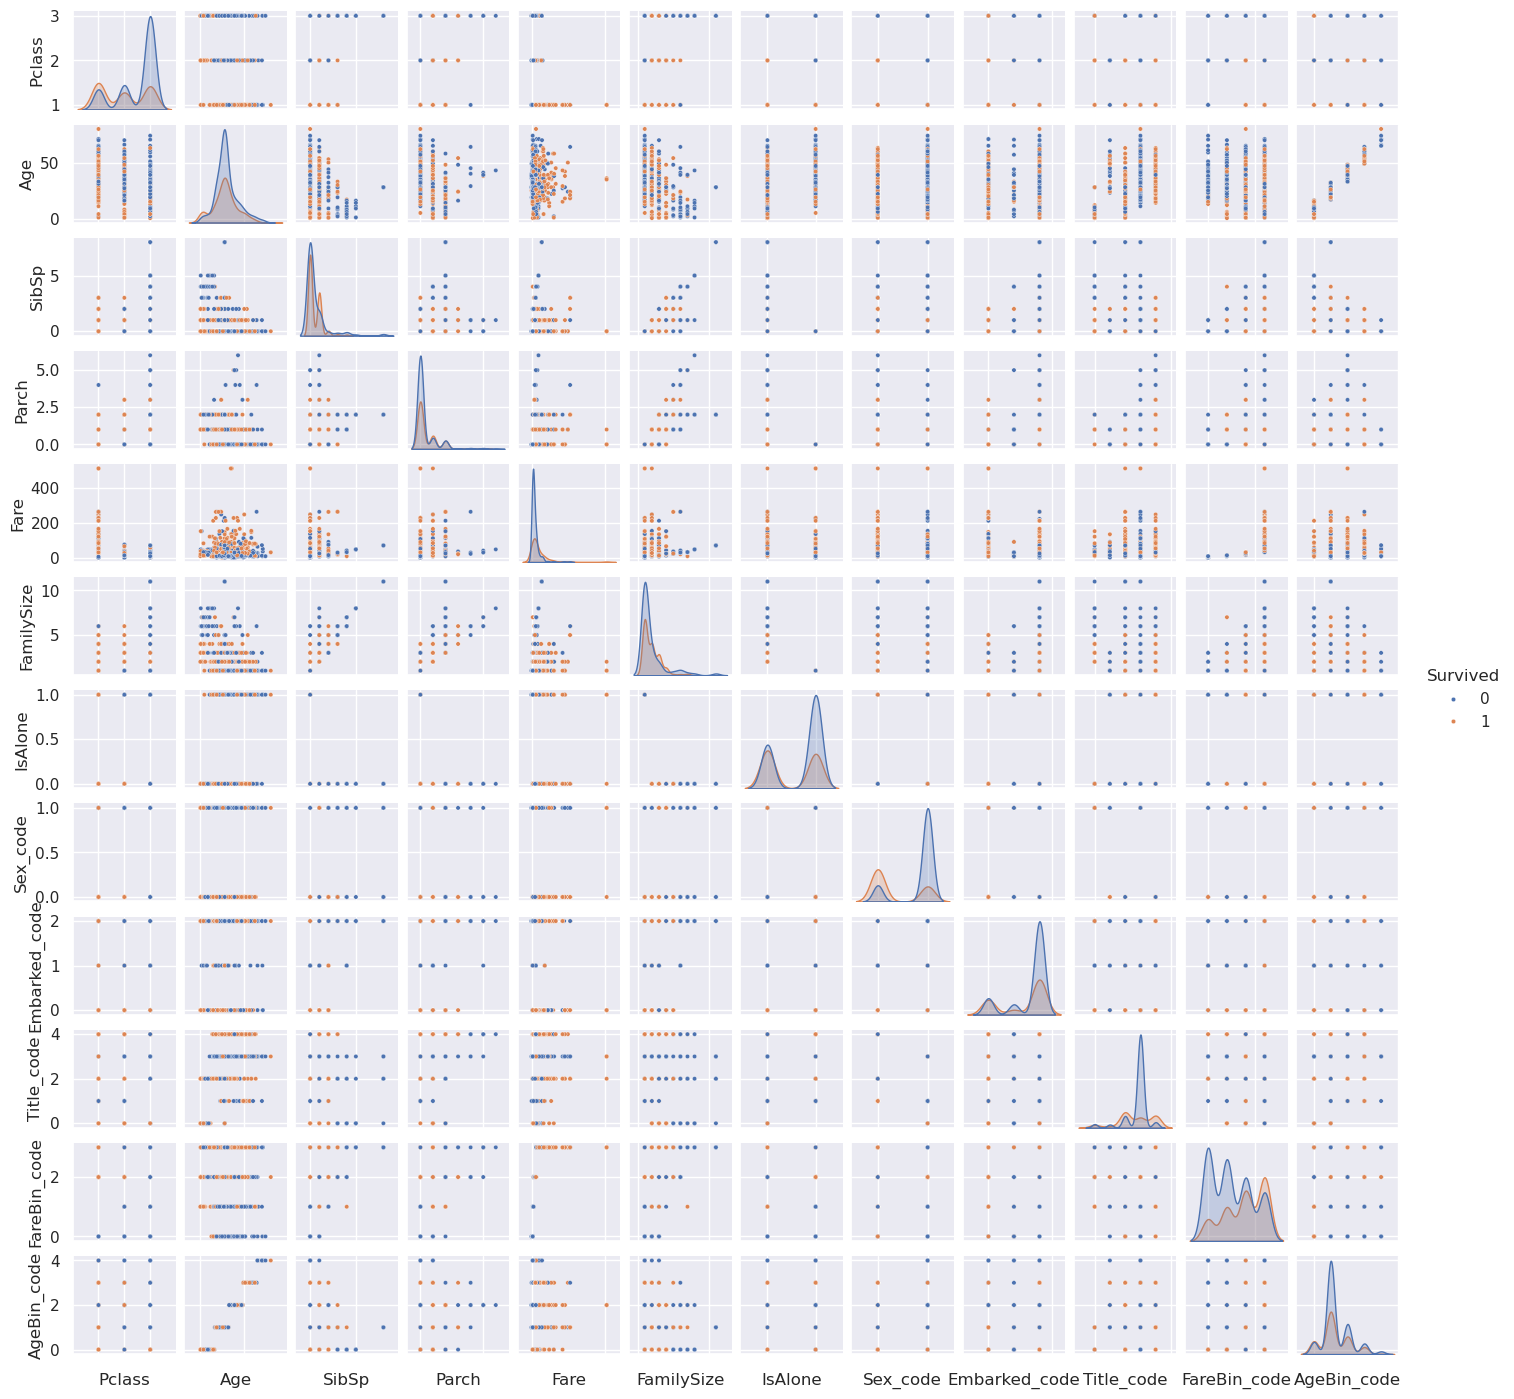

In [20]:
pp = sns.pairplot(data_1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws = dict(shade=True), plot_kws = dict(s=10))
pp.set(xticklabels=[])

## Feature Selection

In [21]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   FamilySize     891 non-null    int64   
 10  IsAlone        891 non-null    int64   
 11  Title          891 non-null    object  
 12  FareBin        891 non-null    category
 13  AgeBin         891 non-null    category
 14  Sex_code       891 non-null    int64   
 15  Embarked_code  891 non-null    int64   
 16  Title_code     891 non-null    int64   
 17  FareBin_code   891 non-null    int6

In [22]:
cat_features = data_1[['Sex_code', 'Embarked_code', 'Title_code', 'FareBin_code', 'AgeBin_code']].columns.to_list()
num_cols = data_1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']].columns.to_list()

print(cat_features)
print(num_cols)

['Sex_code', 'Embarked_code', 'Title_code', 'FareBin_code', 'AgeBin_code']
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']


### Chi Squared Test
- Feature selection for categorical features

In [23]:
features = data_1.loc[:, cat_features]
target_value = data_1.loc[:, target[0]]

best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(features, target_value)

features_score = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['chi Squared Score'])

In [24]:
features_score.sort_values('chi Squared Score', ascending = False) 

,chi Squared Score
Sex_code,92.702447
FareBin_code,66.603196
Embarked_code,10.202525
Title_code,1.810140
AgeBin_code,0.901670


- the columns (Title_code , AgeBin_code) have a smaller score so i will not use them

### ANOVA Test
- Feature selection for numerical features

In [25]:
features = data_1.loc[:, num_cols]
target_value = data_1.loc[:, target[0]]

best_features = SelectKBest(score_func = f_classif, k = 'all')
fit = best_features.fit(features, target_value)

features_score = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['F_Classif'])

In [26]:
features_score.sort_values('F_Classif', ascending = False) 

,F_Classif
Pclass,115.031272
Fare,63.030764
IsAlone,38.353651
Parch,5.963464
Age,3.761528
SibSp,1.110572
FamilySize,0.246193


- the columns (SibSp , FamilySize) have a smaller score so i will not use them

## Split Training and Test set

In [27]:
data_1_x_bin.remove('Title_code')
data_1_x_bin.remove('FamilySize')
data_1_x_bin.extend(['Parch'])
print(data_1_x_bin)

['Pclass', 'Sex_code', 'Embarked_code', 'IsAlone', 'FareBin_code', 'AgeBin_code', 'Parch']


In [28]:
x_train, x_test, y_train, y_test = train_test_split(data_1[data_1_x_bin], data_1[target], test_size = 0.25, random_state = 0)

print('shape of training set', x_train.shape)
print('shape of testing set', x_test.shape)
x_train.head()

shape of training set (668, 7)
shape of testing set (223, 7)


,Pclass,Sex_code,Embarked_code,IsAlone,FareBin_code,AgeBin_code,Parch
105,3,1,2,1,0,1,0
68,3,0,2,0,1,1,2
253,3,1,2,0,2,1,0
320,3,1,2,1,0,1,0
706,2,0,2,1,1,2,0


## Model Data

In [29]:
#Machine Learning Algorithm (MLA) Selection and Initialization
 
MLA = [
    LogisticRegression(),
    GaussianNB(), 
    KNeighborsClassifier(), 
    LinearSVC(), 
    SVC(), 
    DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    LinearDiscriminantAnalysis(), 
    AdaBoostClassifier(),
    BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

cv_split = KFold(n_splits = 5, shuffle = True, random_state = 0)

# create Data Frame to compare ML ALgorithms
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD']
ML_table = pd.DataFrame(columns = MLA_columns)

# create data frame to compare ML algorithms predictions
ML_predict = y_test.copy()

row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    ML_table.loc[row_index, 'MLA Name'] = MLA_name
    ML_table.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = cross_validate(estimator = alg, X = x_train, y = y_train, cv = cv_split, return_train_score = True)

    ML_table.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    ML_table.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()

    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    ML_table.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3

    alg.fit(x_train, y_train)
    ML_predict[MLA_name] = alg.predict(x_test)

    row_index += 1

ML_table.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
ML_table

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD
11,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.850296,0.818797,0.074417
4,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.825597,0.817338,0.03767
9,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.878365,0.806868,0.048446
13,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.880985,0.800875,0.058435
12,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.88323,0.796342,0.078523
2,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.843932,0.796308,0.086679
10,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.88323,0.793379,0.060571
6,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.88323,0.791898,0.067509
5,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.88323,0.790394,0.071473
3,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': 'warn...",0.788923,0.785883,0.067309


In [30]:
ML_predict.sample(10)

,Survived,LogisticRegression,GaussianNB,KNeighborsClassifier,LinearSVC,SVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,XGBClassifier
439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
642,0,1,1,1,1,0,0,0,1,1,0,0,0,1,1
837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
316,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
644,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Algorithm')

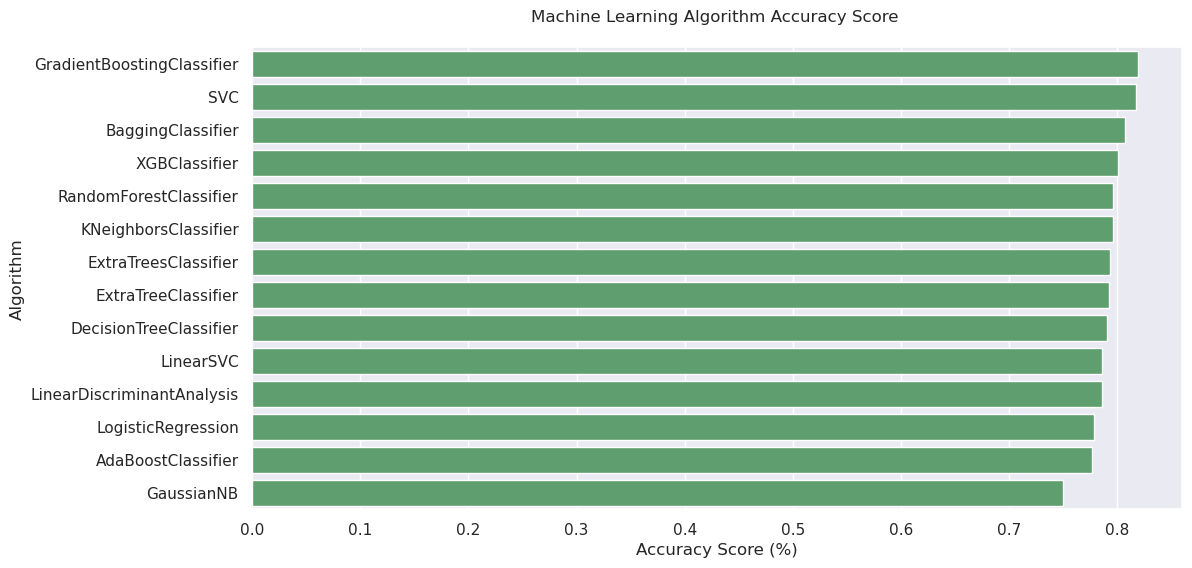

In [31]:
plt.figure(figsize = (12, 6))
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = ML_table, color = 'g')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

## Hyperparameter Tuning

### GradientBoostingClassifier

In [ ]:
params = {
          'loss': ['log_loss', 'exponential'],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
          'n_estimators': [50, 100, 150, 200, 300], 
          'criterion': ['friedman_mse', 'squared_error'],
          'max_features': ['sqrt', 'log2']
          }
gs = GridSearchCV(GradientBoostingClassifier(), param_grid = params, n_jobs = -1, cv = cv_split, 
                  verbose = 3)
gs.fit(x_train, y_train)

In [35]:
gs.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'log_loss',
 'max_features': 'log2',
 'n_estimators': 200}

In [34]:
gs.best_score_

0.8248232521602514

In [36]:
gs.score(x_test, y_test)

0.8116591928251121

In [39]:
model_gb = GradientBoostingClassifier(criterion = 'friedman_mse',
                                    learning_rate = 0.01,
                                    loss = 'log_loss',
                                    max_features = 'log2',
                                    n_estimators = 200, random_state = 0)
model_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features='log2',
                           n_estimators=200, random_state=0)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def model_score(name_model):
    print('the accuracy of the model is {:.3f}'.format(accuracy_score(y_test, name_model.predict(x_test))))
    print(f'the confusion matrix of the model is')
    print(confusion_matrix(y_test, name_model.predict(x_test)))
    print(f'the classification report of the model is')
    print(classification_report(y_test, name_model.predict(x_test)))

In [49]:
model_score(model_gb)

the accuracy of the model is 0.816
the confusion matrix of the model is
[[130   9]
 [ 32  52]]
the classification report of the model is
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       139
           1       0.85      0.62      0.72        84

    accuracy                           0.82       223
   macro avg       0.83      0.78      0.79       223
weighted avg       0.82      0.82      0.81       223



### Support Vector Machine

In [ ]:
params = [
    {'C': np.arange(1.0, 10.0, 1.0),
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
    },
    {
    'C': np.arange(1.0, 10.0, 1.0),
    'kernel': ['linear', 'sigmoid'],
    }
]
gs = GridSearchCV(SVC(), param_grid = params, n_jobs = -1, cv = cv_split, 
                  verbose = 2)
gs.fit(x_train, y_train)

In [51]:
gs.best_params_

{'C': 2.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [52]:
gs.best_score_

0.8218381775333856

In [53]:
gs.score(x_test, y_test)

0.7982062780269058

In [54]:
model_svc = SVC(C = 2.0, gamma = 'scale', kernel = 'rbf')
model_svc.fit(x_train, y_train)

SVC(C=2.0)

In [55]:
model_score(model_svc)

the accuracy of the model is 0.798
the confusion matrix of the model is
[[121  18]
 [ 27  57]]
the classification report of the model is
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       139
           1       0.76      0.68      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.80      0.80      0.80       223



### Linear SVC

In [ ]:
params = {
    'penalty': ['l2', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': ['auto', True, False],
    'C': np.arange(1.0, 10.0, 1.0)
}
gs = GridSearchCV(LinearSVC(), param_grid = params, n_jobs = -1, cv = cv_split, 
                  verbose = 1)
gs.fit(x_train, y_train)

In [57]:
gs.best_params_

{'C': 6.0, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [58]:
gs.best_score_

0.7888789137021659

In [59]:
gs.score(x_test, y_test)

0.7937219730941704

In [61]:
model_lsvc = LinearSVC(C = 6.0, dual = True, loss = 'squared_hinge',
penalty = 'l2')
model_lsvc.fit(x_train, y_train)

LinearSVC(C=6.0, dual=True)

In [62]:
model_score(model_lsvc)

the accuracy of the model is 0.798
the confusion matrix of the model is
[[116  23]
 [ 22  62]]
the classification report of the model is
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       139
           1       0.73      0.74      0.73        84

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



### K-nearest Neighbors Clsssifier

In [65]:
# calculating the accuracy of the models with different of K
mean_acc = np.zeros(30)
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, y_hat)
mean_acc

array([0.76681614, 0.77578475, 0.80269058, 0.80269058, 0.82511211,
       0.81165919, 0.80269058, 0.79820628, 0.81165919, 0.80717489,
       0.80269058, 0.80269058, 0.79372197, 0.78026906, 0.78923767,
       0.77130045, 0.78026906, 0.78475336, 0.78026906, 0.77130045,
       0.80269058, 0.79372197, 0.78923767, 0.79820628, 0.79372197,
       0.77578475, 0.80269058, 0.78923767, 0.79372197, 0.79372197])

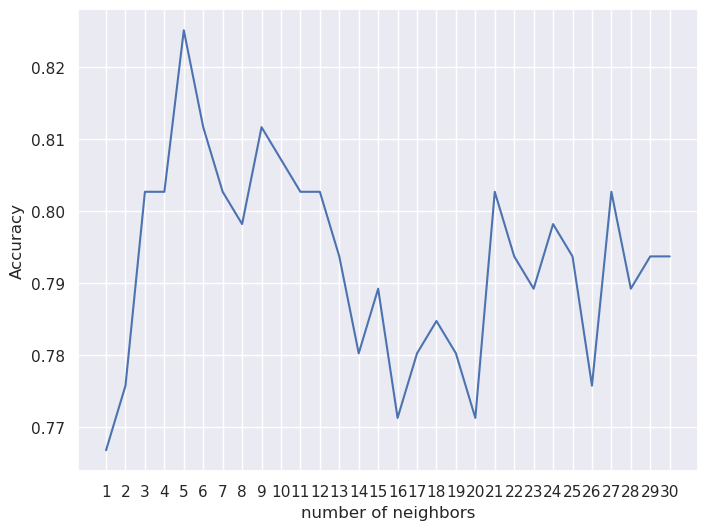

In [70]:
plt.figure(figsize=(8,6))
plt.plot(range(1,31),mean_acc)
plt.xticks(np.arange(1,31,1.0))
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
params = {
    'n_neighbors': np.arange(1,11,1),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
gs = GridSearchCV(KNeighborsClassifier(), param_grid = params, n_jobs = -1, cv = cv_split, 
                  verbose = 1)
gs.fit(x_train, y_train)

In [72]:
gs.best_params_

{'algorithm': 'brute',
 'metric': 'minkowski',
 'n_neighbors': 3,
 'weights': 'uniform'}

In [73]:
gs.best_score_

0.803826731006621

In [75]:
gs.score(x_test, y_test)

0.820627802690583

In [76]:
model_knn = KNeighborsClassifier(algorithm = 'brute', metric = 'minkowski',
                                 n_neighbors = 3, weights = 'uniform')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [77]:
model_score(model_knn)

the accuracy of the model is 0.821
the confusion matrix of the model is
[[123  16]
 [ 24  60]]
the classification report of the model is
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       139
           1       0.79      0.71      0.75        84

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



### Logistic Regression

In [ ]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}
gs = GridSearchCV(LogisticRegression(), param_grid = params, n_jobs = -1, cv = cv_split)
gs.fit(x_train, y_train)

In [79]:
gs.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [80]:
gs.best_score_

0.7903602289305354

In [81]:
gs.score(x_test, y_test)

0.7847533632286996

In [82]:
model_lr = LogisticRegression(C = 0.234, max_iter = 100, penalty = 'l1', 
                              solver = 'liblinear')
model_lr.fit(x_train, y_train)

LogisticRegression(C=0.234, penalty='l1', solver='liblinear')

In [83]:
model_score(model_lr)

the accuracy of the model is 0.785
the confusion matrix of the model is
[[117  22]
 [ 26  58]]
the classification report of the model is
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       139
           1       0.72      0.69      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



### Decision Tree Classifier

In [84]:
params = {'criterion': ['gini', 'entropy'],  
            'max_depth': [2,4,6,8,10,None], 
            'random_state': [0] 
            }
gs = GridSearchCV(DecisionTreeClassifier(), param_grid = params, n_jobs = -1, cv = cv_split, verbose = 1)
gs.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'random_state': [0]},
             verbose=1)

In [85]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 4, 'random_state': 0}

In [86]:
gs.best_score_

0.8098305465155425

In [87]:
gs.score(x_test, y_test)

0.7937219730941704

### save the final prediction of the best model to csv

In [91]:
pd.DataFrame(data = {'Gradient Boostin classifier': [accuracy_score(y_test, model_gb.predict(x_test))],
                     'SVC': [accuracy_score(y_test, model_svc.predict(x_test))],
                     'Linear_SVC': [accuracy_score(y_test, model_lsvc.predict(x_test))],
                     'KNN': [accuracy_score(y_test, model_knn.predict(x_test))],
                     'Logistic regression': [accuracy_score(y_test, model_lr.predict(x_test))],
                     'Decision Tree': [gs.score(x_test, y_test)]})

,Gradient Boostin classifier,SVC,Linear_SVC,KNN,Logistic regression,Decision Tree
0,0.816143,0.798206,0.798206,0.820628,0.784753,0.793722


In [100]:
test_data['Survived'] = model_knn.predict(test_data[data_1_x_bin])
submit = test_data[['PassengerId', 'Survived']]
submit.to_csv('/home/abdelmoneim/سطح المكتب/Kaggle Projects/Titanic/submit.csv', index = False)

In [101]:
submit.sample(10)

,PassengerId,Survived
90,982,0
296,1188,1
141,1033,1
11,903,0
31,923,0
303,1195,0
194,1086,1
217,1109,0
65,957,1
228,1120,0


- thanks